# 📊 Netflix Movies & TV Shows - Exploratory Data Analysis

This notebook explores a dataset of 9,000+ Netflix titles to uncover insights around genres, popularity, ratings, and yearly content trends. The goal is to identify key patterns to support recommendation systems and content strategy for Netflix.

---


## ❓ Problem Statement

- What genres dominate Netflix's content?
- How has content production changed over time?
- What is the rating distribution of content?
- Which content is most or least popular?


In [42]:
# 📦 Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
# 📂 Load the dataset
df = pd.read_csv('cleaned_mymoviedb.csv')

In [6]:
# 🔍 Preview and basic information
print(df.head())
print(df.info())
print(df.describe())

  Release_Date                    Title  \
0   2021-12-15  Spider-Man: No Way Home   
1   2022-03-01               The Batman   
2   2022-02-25                  No Exit   
3   2021-11-24                  Encanto   
4   2021-12-22           The King's Man   

                                            Overview  Popularity Vote_Count  \
0  Peter Parker is unmasked and no longer able to...    5083.954       8940   
1  In his second year of fighting crime, Batman u...    3827.658       1151   
2  Stranded at a rest stop in the mountains durin...    2618.087        122   
3  The tale of an extraordinary family, the Madri...    2402.201       5076   
4  As a collection of history's worst tyrants and...    1895.511       1793   

  Vote_Average Original_Language                               Genre  \
0          8.3                en  Action, Adventure, Science Fiction   
1          8.1                en            Crime, Mystery, Thriller   
2          6.3                en                  

In [8]:
# 🔄 Convert 'Vote_Count' and 'Vote_Average' to numeric
df['Vote_Count'] = pd.to_numeric(df['Vote_Count'], errors='coerce')
df['Vote_Average'] = pd.to_numeric(df['Vote_Average'], errors='coerce')
print(df.info())  # Confirm conversion

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9836 entries, 0 to 9835
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Release_Date       9836 non-null   object 
 1   Title              9827 non-null   object 
 2   Overview           9827 non-null   object 
 3   Popularity         9826 non-null   float64
 4   Vote_Count         9825 non-null   float64
 5   Vote_Average       9825 non-null   float64
 6   Original_Language  9826 non-null   object 
 7   Genre              9825 non-null   object 
 8   Poster_Url         9825 non-null   object 
dtypes: float64(3), object(6)
memory usage: 691.7+ KB
None


In [10]:
# 🗓️ Convert 'Release_Date' to year format only
df['Release_Date'] = pd.to_datetime(df['Release_Date'], errors='coerce')
df['Release_Year'] = df['Release_Date'].dt.year

In [ ]:
# 🗑️ Drop unnecessary columns
df.drop(['Overview', 'Original_Language', 'Poster_Url', 'Release_Date'], axis=1, inplace=True)


In [14]:
# 🎯 Categorize 'Vote_Average' for better analysis
def categorize_column(df, col, labels):
    edges = [
        df[col].min(),
        df[col].quantile(0.25),
        df[col].quantile(0.5),
        df[col].quantile(0.75),
        df[col].max()
    ]
    df[col + '_Category'] = pd.cut(df[col], bins=edges, labels=labels, include_lowest=True)
    return df

vote_labels = ['Not Popular', 'Below Average', 'Average', 'Popular']
df = categorize_column(df, 'Vote_Average', vote_labels)

In [16]:
# 🎬 Process 'Genre' column
df['Genre'] = df['Genre'].str.split(', ')
df = df.explode('Genre').reset_index(drop=True)
df['Genre'] = df['Genre'].astype('category')

In [18]:
# 🧼 Final cleanup
df.dropna(inplace=True)
print(df.isna().sum())

Title                    0
Popularity               0
Vote_Count               0
Vote_Average             0
Genre                    0
Release_Year             0
Vote_Average_Category    0
dtype: int64


# What is the most frequent Genere of movies relased on netflix ?

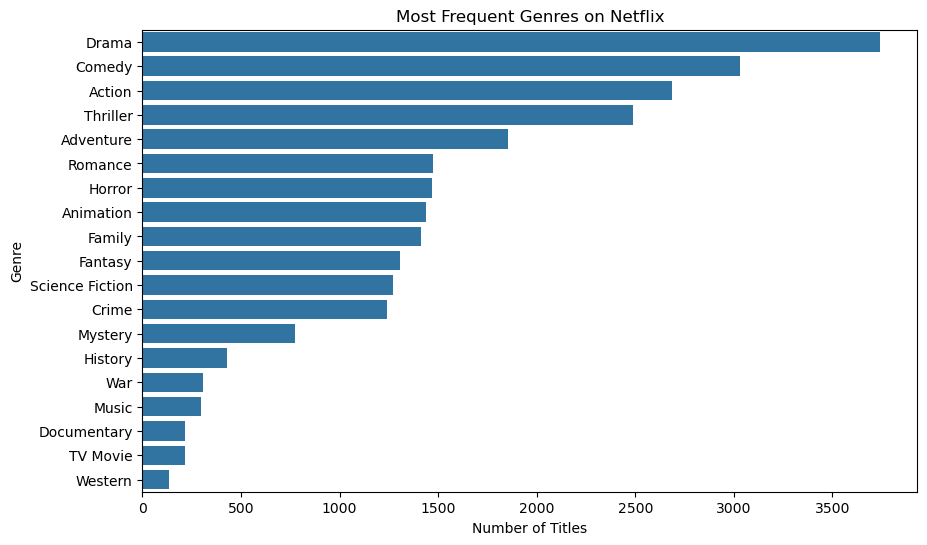

In [47]:
# 📊 Visualization 1: Most frequent genres
plt.figure(figsize=(10, 6))
sns.countplot(y='Genre', data=df, order=df['Genre'].value_counts().index, )
plt.title('Most Frequent Genres on Netflix')
plt.xlabel('Number of Titles')
plt.ylabel('Genre')
plt.show()

# Which has highest Votes in vote avg column ?

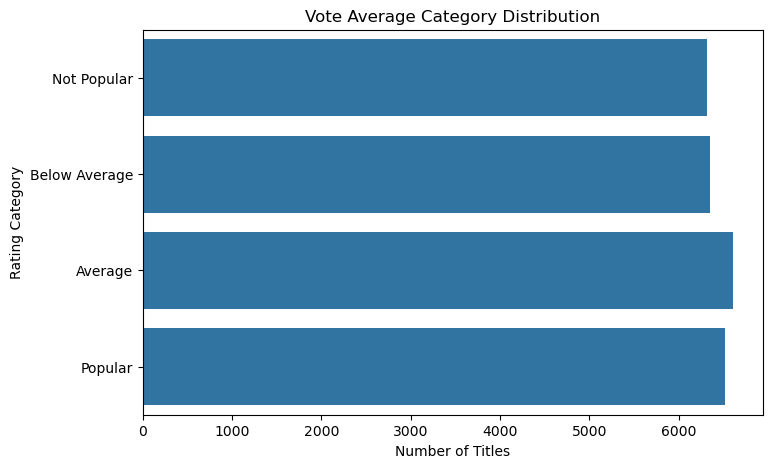

In [28]:
# 📊 Visualization 2: Distribution of vote average categories
plt.figure(figsize=(8, 5))
sns.countplot(y='Vote_Average_Category', data=df,)
plt.title('Vote Average Category Distribution')
plt.xlabel('Number of Titles')
plt.ylabel('Rating Category')
plt.show()

# which movie got the highest popularity ??what is it genre?

In [36]:
# 🥇 Movie with highest popularity
print("Most Popular Movie:\n", df[df['Popularity'] == df['Popularity'].max()])

Most Popular Movie:
                      Title  Popularity  Vote_Count  Vote_Average  \
0  Spider-Man: No Way Home    5083.954      8940.0           8.3   
1  Spider-Man: No Way Home    5083.954      8940.0           8.3   
2  Spider-Man: No Way Home    5083.954      8940.0           8.3   

             Genre  Release_Year Vote_Average_Category  
0           Action        2021.0               Popular  
1        Adventure        2021.0               Popular  
2  Science Fiction        2021.0               Popular  


# which movie got the lowest popularity ??what is it genre?

In [38]:
# 🥶 Movie with lowest popularity
print("Least Popular Movie:\n", df[df['Popularity'] == df['Popularity'].min()])

Least Popular Movie:
                                       Title  Popularity  Vote_Count  \
25794  The United States vs. Billie Holiday      13.354       152.0   
25795  The United States vs. Billie Holiday      13.354       152.0   
25796  The United States vs. Billie Holiday      13.354       152.0   
25797                               Threads      13.354       186.0   
25798                               Threads      13.354       186.0   
25799                               Threads      13.354       186.0   

       Vote_Average            Genre  Release_Year Vote_Average_Category  
25794           6.7            Music        2021.0               Average  
25795           6.7            Drama        2021.0               Average  
25796           6.7          History        2021.0               Average  
25797           7.8              War        1984.0               Popular  
25798           7.8            Drama        1984.0               Popular  
25799           7.8  Science F

# which year has the most filmmed movies ?

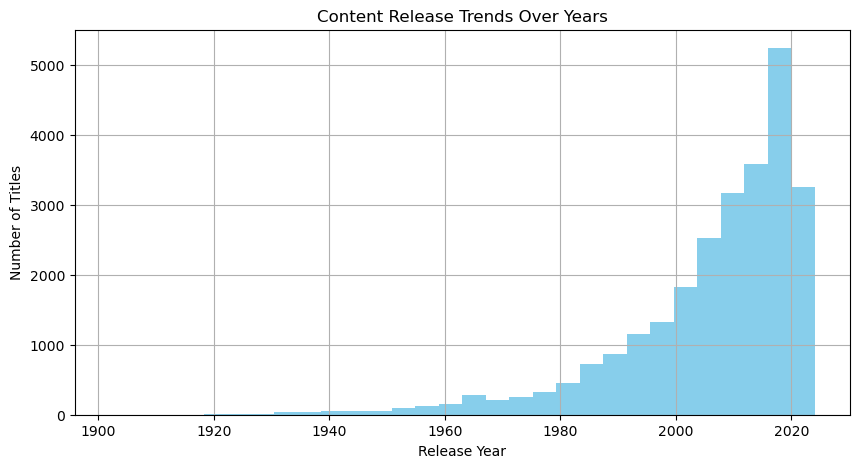

In [40]:
# 📅 Distribution of movies by release year
plt.figure(figsize=(10, 5))
df['Release_Year'].hist(bins=30, color='skyblue')
plt.title('Content Release Trends Over Years')
plt.xlabel('Release Year')
plt.ylabel('Number of Titles')
plt.show()

# ✅ Insights & Conclusion
Here are the key insights gathered from the Netflix movies and TV shows data analysis:

**🎬 Top Genres:**
Drama and Comedy dominate the Netflix catalog, making them the most frequent genres on the platform.

**📈 Content Release Trends:**
Netflix saw a peak in content releases around 2020, likely due to a surge in digital content demand during the pandemic.

**🌟 Most Popular Title:**
Based on the popularity metric, "Spider-Man: No Way Home" emerged as the most popular movie in the dataset.

**🎯 Content Rating Distribution:**
Most titles fall into the "Average" vote category, showing that while Netflix hosts a lot of content, top-rated titles are comparatively fewer.

**📊 Genre Diversity:**
After cleaning and exploding the Genre column, it's evident that Netflix provides a wide variety of genres, though some like Documentary, Action, and Thriller trail behind the top ones.

These insights can help Netflix prioritize popular genres for future content production, identify trends in user preferences, and optimize content recommendation systems.
